<a href="https://colab.research.google.com/github/trachtok/dspracticum2020_data/blob/main/assignment03/assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


# Loading input data

In [3]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# add extra dimension (to have one channel)
x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [4]:
clothes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# make table of our labels just to make visual control of results easier
pd.DataFrame(clothes_labels, index=[1,2,3,4,5,6,7,8,9,10])

,0
1,T-shirt/top
2,Trouser
3,Pullover
4,Dress
5,Coat
6,Sandal
7,Shirt
8,Sneaker
9,Bag
10,Ankle boot


# Normalize data

In [5]:
# Normalize values from [0, 255] to [0, 1] interval
x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

y_train.shape

(60000, 10)

In [6]:
y_train[1:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

# CNN model

In [8]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Dropout(0.5),
      layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1982592   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [9]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 126,
  epochs = 10,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/10
477/477 [==============================] - 266s 557ms/step - loss: 0.4575 - accuracy: 0.8338 - val_loss: 0.3420 - val_accuracy: 0.8805
Epoch 2/10
477/477 [==============================] - 258s 542ms/step - loss: 0.2807 - accuracy: 0.8978 - val_loss: 0.2749 - val_accuracy: 0.8999
Epoch 3/10
477/477 [==============================] - 257s 540ms/step - loss: 0.2226 - accuracy: 0.9180 - val_loss: 0.2732 - val_accuracy: 0.9003
Epoch 4/10
477/477 [==============================] - 262s 548ms/step - loss: 0.1822 - accuracy: 0.9325 - val_loss: 0.2590 - val_accuracy: 0.9098
Epoch 5/10
477/477 [==============================] - 257s 538ms/step - loss: 0.1446 - accuracy: 0.9459 - val_loss: 0.2538 - val_accuracy: 0.9179
Epoch 6/10
477/477 [==============================] - 261s 548ms/step - loss: 0.1148 - accuracy: 0.9569 - val_loss: 0.2771 - val_accuracy: 0.9142
Epoch 7/10
477/477 [==============================] - 258s 540ms/step - loss: 0.0890 - accuracy: 0.9673 - val_loss: 0.2851 -

In [10]:
history.history['accuracy']

[0.8337500095367432,
 0.8977833390235901,
 0.91798335313797,
 0.9325000047683716,
 0.9458666443824768,
 0.956933319568634,
 0.9672999978065491,
 0.9747833609580994,
 0.979366660118103,
 0.9827499985694885]

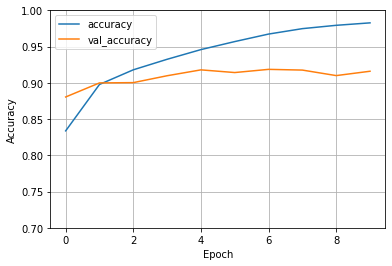

In [11]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  
plot_loss(history, ylim=(0.7, 1))

In [30]:
# make predictions on test data
test_predictions = cnn_model.predict(x_test,batch_size=126)
# create multidimensional array for predictions
y_pred = keras.utils.to_categorical(np.argmax(test_predictions, axis=1), 10)

In [48]:
# indeces of items that were misclassified
false_idx = [i for i, x in enumerate((y_test == y_pred).all(axis=1)) if x == False]
len(false_idx)

840

In [105]:
values_false_pred = list(map(max, test_predictions[false_idx]))

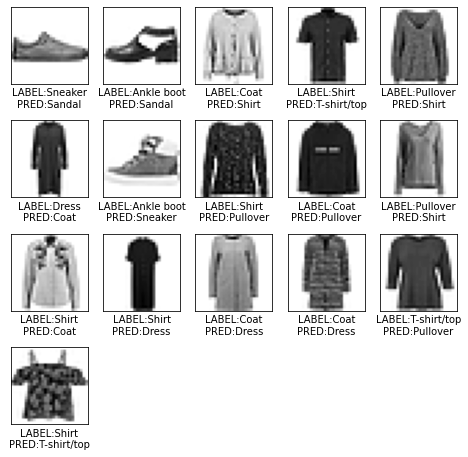

In [140]:
(xplt_train, yplt_train), (xplt_test, yplt_test) = fashion_mnist.load_data()
def plot_image(x, title = ""):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap=plt.cm.binary)
  plt.xlabel(title)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4,5, i // 10 + 1)
  plot_image(xplt_test[false_idx[0:16][i//10]].squeeze(), 
             "LABEL:"+clothes_labels[yplt_test[false_idx[0:16][i//10]]]+"\n"+"PRED:"+clothes_labels[np.argmax(y_pred[false_idx[0:16]],axis=1)[i//10]])

In [137]:
clothes_labels[np.argmax(y_pred[false_idx[0:16]],axis=1)[0]]

'Sandal'